In [1]:
#api login using token text file with token obtained from ibm q-experience website once logged
from qiskit import IBMQ
IBMQ.save_account(open("token.txt").read())

In [3]:
#loading account
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

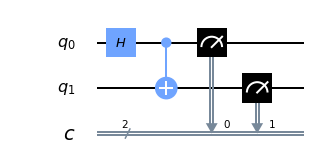

In [4]:
### Andres Coronado, corso di computazione quantistica anno 2019/2020

import qiskit as q
%matplotlib inline

#il mio circuito
circuit = q.QuantumCircuit( 2, 2) #2 qubits, 2 classical bits

#0 , 0
circuit.h(0) 

#1 , 0
circuit.cx(0, 1) #cnot, controlled not. Flips second qubit only if first qbit is 1

#1, 1
circuit.measure([0, 1],[0, 1]) #measurement with output space

circuit.draw(output='mpl')


In [4]:
#printing out all the queues
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count =  len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    #Italian Front-End :-D
    print(f"[{backend.name()}] ha {backend.status().pending_jobs} lavori in coda e {qubit_count} qubits")

[ibmq_qasm_simulator] ha 0 lavori in coda e simulated qubits
[ibmqx2] ha 20 lavori in coda e 5 qubits
[ibmq_16_melbourne] ha 6 lavori in coda e 15 qubits
[ibmq_vigo] ha 4 lavori in coda e 5 qubits
[ibmq_ourense] ha 41 lavori in coda e 5 qubits
[ibmq_london] ha 39 lavori in coda e 5 qubits
[ibmq_burlington] ha 3 lavori in coda e 5 qubits
[ibmq_essex] ha 20 lavori in coda e 5 qubits
[ibmq_armonk] ha 0 lavori in coda e 1 qubits


In [5]:
#chose one backend (less queue better... need to wait....)
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_qasm_simulator")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


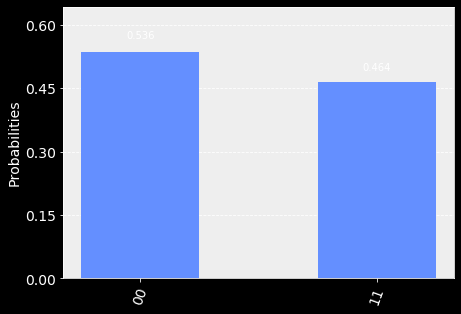

In [6]:
from qiskit.visualization import plot_histogram
from matplotlib import style

#dark background on jupyterLab...
style.use("dark_background")

result=job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])